**Antes que nada correr esta celda para poder usar julia**

In [1]:
# Installation cell
%%capture
%%shell
if ! command -v julia 3>&1 > /dev/null
then
    wget -q 'https://julialang-s3.julialang.org/bin/linux/x64/1.6/julia-1.6.1-linux-x86_64.tar.gz' \
        -O /tmp/julia.tar.gz
    tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
    rm /tmp/julia.tar.gz
fi
julia -e 'using Pkg; pkg"add IJulia; precompile;"'
echo 'Done'

Despues de ejecutar la celda de arriba, Vamos a la barra de opciones de google colab y tocamos en **Editar** y despues en **Configuración del cuaderno** que está abajo de todo casi. Seleccionamos *Julia 1.6* en Tipo de Entorno de Ejecución. Y si queremos cambiamos el acelerador por hardware (default en GPU, les recomiendo que lo saquen). 

<br/>Editar y configuración

> ![Colab Img](https://i.imgur.com/7XLVAMN.png)

<br/>Esta es la configuración que deberian tener:

> ![Colab Img](https://i.imgur.com/UasidBO.png)

<br/>No se olviden de guardar.
<br/>**Arrancamos nomas, recuerden que siempre que se reinicie el entorno o lo que sea ejecuten esto**.






In [1]:
VERSION #Para ver la version de julia

v"1.6.1"

Data

In [ ]:
println("Prueba")

Prueba


In [2]:
import Pkg
Pkg.add("CSV")
using CSV

In [16]:
using Pkg
Pkg.add("Plots")
using Plots

Leer un CSV


In [3]:
csv_reader = CSV.File("Spotify-2000.csv")
println(typeof(csv_reader))

CSV.File{false}


In [4]:
using Pkg
Pkg.add("DataFrames")
using DataFrames

DF completo

In [5]:
df = DataFrame(CSV.File("Spotify-2000.csv"))


,Index,Title,Artist,Top Genre
,Int64,String,String,String
1,1,Sunrise,Norah Jones,adult standards
2,2,Black Night,Deep Purple,album rock
3,3,Clint Eastwood,Gorillaz,alternative hip hop
4,4,The Pretender,Foo Fighters,alternative metal
5,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock
6,6,The Road Ahead (Miles Of The Unknown),City To City,alternative pop rock
7,7,She Will Be Loved,Maroon 5,pop
8,8,Knights of Cydonia,Muse,modern rock
9,9,Mr. Brightside,The Killers,modern rock


Mostrar filas del primero hacia abajo, la cantidad necesaria

In [8]:
first(df, 5)

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM)
,Int64,String,String,String,Int64,Int64
1,1,Sunrise,Norah Jones,adult standards,2004,157
2,2,Black Night,Deep Purple,album rock,2000,135
3,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168
4,4,The Pretender,Foo Fighters,alternative metal,2007,173
5,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106


Acceder a un elemento en especifico

In [9]:
df[2, 2]

"Black Night"

Columna especifica

In [7]:
df[!, :Title]

1994-element Vector{String}:
 "Sunrise"
 "Black Night"
 "Clint Eastwood"
 "The Pretender"
 "Waitin' On A Sunny Day"
 "The Road Ahead (Miles Of The Unknown)"
 "She Will Be Loved"
 "Knights of Cydonia"
 "Mr. Brightside"
 "Without Me"
 "Love Me Tender"
 "Seven Nation Army"
 "Als Het Golft"
 ⋮
 "Get Ready"
 "Black Magic Woman - 2018 Remaster"
 "Suite: Judy Blue Eyes - Remastered"
 "Blue Suede Shoes"
 "Jailhouse Rock"
 "My Baby Just Cares for Me - 2013 Remastered Version"
 "Summertime"
 "Heartbreak Hotel"
 "Hound Dog"
 "Johnny B. Goode"
 "Take Five"
 "Blueberry Hill"

Grafico generico de prueba

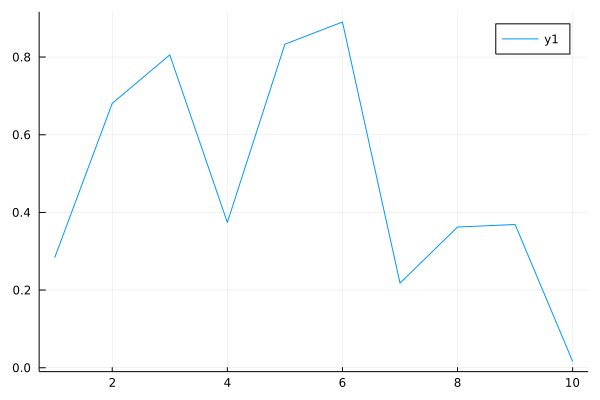

In [17]:
x = 1:10; y = rand(10); # These are the plotting data
plot(x, y)

Value counts


In [13]:
df2 = combine(groupby(df, [:Artist]), nrow => :count)

,Artist,count
,String,Int64
1,Norah Jones,2
2,Deep Purple,4
3,Gorillaz,2
4,Foo Fighters,9
5,Bruce Springsteen,23
6,City To City,1
7,Maroon 5,2
8,Muse,15
9,The Killers,3


In [15]:
sort!(df2, [:count], rev = true)

,Artist,count
,String,Int64
1,Queen,37
2,The Beatles,36
3,Coldplay,27
4,U2,26
5,The Rolling Stones,24
6,Bruce Springsteen,23
7,Michael Jackson,23
8,ABBA,22
9,David Bowie,21


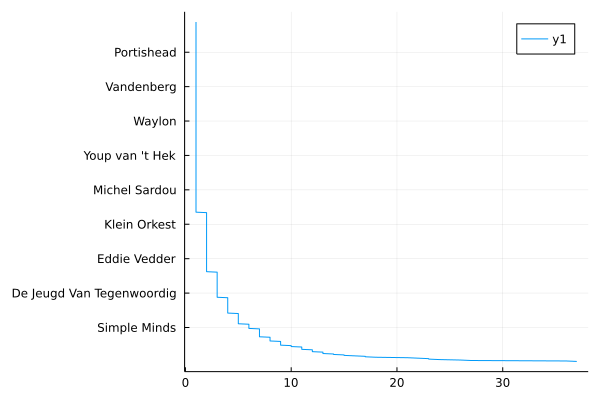

In [21]:
x = df2[!, :count]; y = df2[!, :Artist] # 2 columns means two lines
plot(x, y)